# REINFORCEMENT LEARNING  (Q - LEARNING)

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import gym
import time
%matplotlib notebook

In [2]:
from gym.envs.registration import register

try:
    register(
        id='FrozenLakeNotSlippery-v0',
        entry_point='gym.envs.toy_text:FrozenLakeEnv',
        kwargs={'map_name' : '4x4', 'is_slippery': False},
        max_episode_steps=100,
        reward_threshold=0.78, # optimum = .8196
    )
except:
    print('Already registered!')

In [3]:
from IPython.display import clear_output

In [4]:
env = gym.make('FrozenLakeNotSlippery-v0')
env.reset()

0

In [5]:
for step in range(15):
    env.render()
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    time.sleep(0.5)
    clear_output(wait=True)
    if done:
        env.reset()
env.close()    

  (Up)
SFFF
FHFH
FFFH
HFFG


In [6]:
# observation

In [7]:
action_size = env.action_space.n
state_size = env.observation_space.n

q_table = np.zeros([state_size, action_size])

In [8]:
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [9]:
EPOCHS = 20000  # episodes
ALPHA = 0.8     # learning rate
GAMMA = 0.95    # discount rate

In [10]:
epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.001

In [11]:
def epsilon_greedy_action_selection(epsilon, q_table, discrete_state):
    
    random_number = np.random.random()
    
    # Exploitation (choose action that maximizes Q)
    if random_number > epsilon:
        state_row = q_table[discrete_state,:]
        action = np.argmax(state_row)
    
    # Exploration (choose a random action)
    else:
        action = env.action_space.sample()
    return action

In [12]:
def compute_next_q_value(old_q_value, reward, next_optimal_q_value):
    
    return old_q_value + ALPHA * (reward + GAMMA * next_optimal_q_value - old_q_value)

In [13]:
def reduce_epsilon(epsilon, epoch):
    
    return min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*epoch)

In [14]:
rewards = []
log_interval = 1000

for episode in range(EPOCHS):
    
    state = env.reset()
    done = False
    total_rewards = 0
    
    while not done:
        # Action
        action = epsilon_greedy_action_selection(epsilon, q_table, state)
        
        # state, reward...env.step()
        new_state, reward, done, info = env.step(action)
        
        # old (current) Q value Q(st, at)
        old_q_value = q_table[state, action]
        
        # Get next optimal Q value (max Q value for this state) Q(st+1, at+1)
        next_optimal_q_value = np.max(q_table[new_state,:])
        
        # Compute the next Q value
        next_q = compute_next_q_value(old_q_value, reward, next_optimal_q_value)
        
        # Update the table
        q_table[state, action] = next_q
        
        # track rewards
        total_rewards = total_rewards + reward
        
        # new state is now the state
        state = new_state
        
    # Agent finished a round of game
    episode += 1
    epsilon = reduce_epsilon(epsilon, episode)
    rewards.append(total_rewards)
    
    if episode%log_interval == 0:
        print(np.sum(rewards))
    
env.close()

257.0
985.0
1869.0
2830.0
3802.0
4789.0
5778.0
6762.0
7751.0
8742.0
9733.0
10721.0
11715.0
12706.0
13701.0
14693.0
15685.0
16678.0
17670.0
18658.0


In [15]:
q_table

array([[0.73509189, 0.77378094, 0.77378094, 0.73509189],
       [0.73509189, 0.        , 0.81450625, 0.77378094],
       [0.77378094, 0.857375  , 0.77378094, 0.81450625],
       [0.81450625, 0.        , 0.77378094, 0.77378094],
       [0.77378094, 0.81450625, 0.        , 0.73509189],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.        , 0.81450625],
       [0.        , 0.        , 0.        , 0.        ],
       [0.81450625, 0.        , 0.857375  , 0.77378094],
       [0.81450625, 0.9025    , 0.9025    , 0.        ],
       [0.857375  , 0.95      , 0.        , 0.857375  ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.95      , 0.857375  ],
       [0.9025    , 0.95      , 1.        , 0.9025    ],
       [0.        , 0.        , 0.        , 0.        ]])

In [19]:
#Testing agent

In [18]:
state = env.reset()

env.render()
time.sleep(0.7)
clear_output(wait=True)
for steps in range(100):
    action = np.argmax(q_table[state,:])
    state, reward, done, info = env.step(action)
    env.render()    
    time.sleep(0.7)
    clear_output(wait=True)
    
    if done:
        break
env.close()

  (Right)
SFFF
FHFH
FFFH
HFFG


<IPython.core.display.Javascript object>


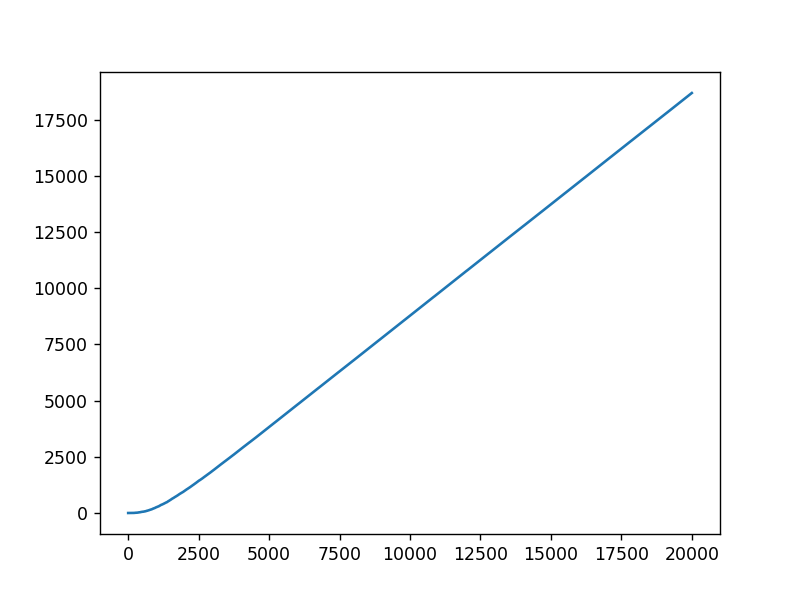

In [20]:
rewards = []
log_interval = 1000

####
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.canvas.draw()
epoch_plot_tracker = []
total_reward_plot_tracker = []
####

for episode in range(EPOCHS):
    
    state = env.reset()
    done = False
    total_rewards = 0
    
    while not done:
        # Action
        action = epsilon_greedy_action_selection(epsilon, q_table, state)
        
        # state, reward...env.step()
        new_state, reward, done, info = env.step(action)
        
        # old (current) Q value Q(st, at)
        old_q_value = q_table[state, action]
        
        # Get next optimal Q value (max Q value for this state) Q(st+1, at+1)
        next_optimal_q_value = np.max(q_table[new_state,:])
        
        # Compute the next Q value
        next_q = compute_next_q_value(old_q_value, reward, next_optimal_q_value)
        
        # Update the table
        q_table[state, action] = next_q
        
        # track rewards
        total_rewards = total_rewards + reward
        
        # new state is now the state
        state = new_state
        
    # Agent finished a round of game
    episode += 1
    epsilon = reduce_epsilon(epsilon, episode)
    rewards.append(total_rewards)
    
    total_reward_plot_tracker.append(np.sum(rewards))
    epoch_plot_tracker.append(episode)
    
    if episode%log_interval == 0:
#         print(np.sum(rewards))
        ax.clear()
        ax.plot(epoch_plot_tracker, total_reward_plot_tracker)
        fig.canvas.draw()    
    
env.close()